        ARIMA and Seasonal ARIMA
        Autoregressive Integrated Moving Averages
        The general process for ARIMA models is the following:

            - Visualize the Time Series Data
            - Make the time series data stationary
            - Plot the Correlation and AutoCorrelation Charts
            - Construct the ARIMA Model or Seasonal ARIMA based on the data
            - Use the model to make predictions


In [176]:
import sys
import os 
import pandas as pd 

In [177]:
sys.path.append(os.path.abspath('../src'))

In [178]:
from models import fit_arima

In [179]:
data_df = pd.read_csv('../data/processed/amzn_processed')

In [199]:
data_df.tail(4)

,Date,Close,Close First Difference,forecast
1408,2025-10-20 00:00:00-04:00,216.479996,3.440002,NaN
1409,2025-10-21 00:00:00-04:00,222.029999,5.550003,NaN
1410,2025-10-22 00:00:00-04:00,217.949997,-4.080002,NaN
1411,2025-10-23 00:00:00-04:00,221.089996,3.139999,NaN


In [181]:
data_df.head(4)

,Date,Open,High,Low,Close,Volume,MA20,MA50,BB_high,BB_low,rsi
0,2020-03-13 00:00:00-04:00,87.750000,89.315498,84.030998,89.250000,176194000,97.695725,97.46511,111.280074,84.111376,40.552393
1,2020-03-16 00:00:00-04:00,82.075500,87.972504,81.301498,84.457497,178346000,96.581425,97.25625,110.686998,82.475851,35.888810
2,2020-03-17 00:00:00-04:00,88.773499,92.889000,84.461998,90.391998,218342000,95.711850,97.18912,109.032143,82.391557,44.413508
3,2020-03-18 00:00:00-04:00,87.500000,92.083000,87.250000,91.500000,192904000,94.861300,97.11624,106.845905,82.876694,45.860935


In [182]:
data_df = data_df [["Date", "Close"]].copy()
data_df

,Date,Close
0,2020-03-13 00:00:00-04:00,89.250000
1,2020-03-16 00:00:00-04:00,84.457497
2,2020-03-17 00:00:00-04:00,90.391998
3,2020-03-18 00:00:00-04:00,91.500000
4,2020-03-19 00:00:00-04:00,94.046501
...,...,...
1407,2025-10-17 00:00:00-04:00,213.039993
1408,2025-10-20 00:00:00-04:00,216.479996
1409,2025-10-21 00:00:00-04:00,222.029999
1410,2025-10-22 00:00:00-04:00,217.949997


In [183]:
data_df.describe()

,Close
count,1412.000000
mean,158.136968
std,37.353036
min,81.820000
25%,129.127502
50%,160.118256
75%,180.862503
max,242.059998



        Visualize the Data

<Axes: >

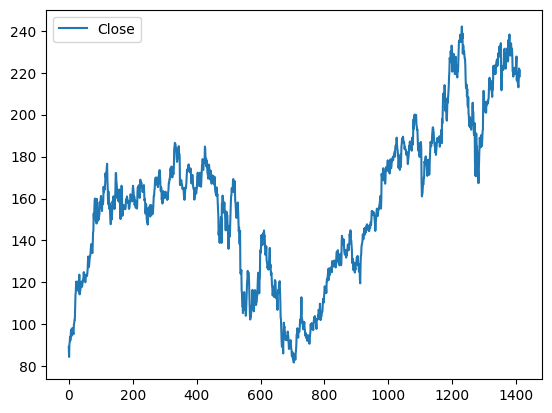

In [184]:
data_df.plot()

In [185]:

from statsmodels.tsa.stattools import adfuller
import numpy as np
# Testing For Stationarity
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [186]:
adfuller_test(data_df['Close'])

ADF Test Statistic : -1.7781540544386651
p-value : 0.3913602586985947
#Lags Used : 0
Number of Observations Used : 1411
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


         Differencing

In [187]:
data_df['Close First Difference'] = data_df['Close'] - data_df['Close'].shift(1)

In [188]:
data_df.head(5)

,Date,Close,Close First Difference
0,2020-03-13 00:00:00-04:00,89.250000,NaN
1,2020-03-16 00:00:00-04:00,84.457497,-4.792503
2,2020-03-17 00:00:00-04:00,90.391998,5.934502
3,2020-03-18 00:00:00-04:00,91.500000,1.108002
4,2020-03-19 00:00:00-04:00,94.046501,2.546501


In [189]:
data_df.dropna(inplace=True)

In [190]:
data_df.head(5)

,Date,Close,Close First Difference
1,2020-03-16 00:00:00-04:00,84.457497,-4.792503
2,2020-03-17 00:00:00-04:00,90.391998,5.934502
3,2020-03-18 00:00:00-04:00,91.500000,1.108002
4,2020-03-19 00:00:00-04:00,94.046501,2.546501
5,2020-03-20 00:00:00-04:00,92.304497,-1.742004


<Axes: >

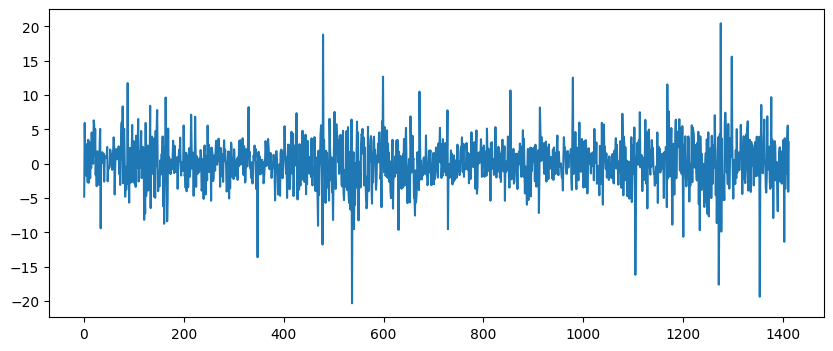

In [191]:
data_df['Close First Difference'].plot(figsize=(10,4))

        Auto Regressive Model


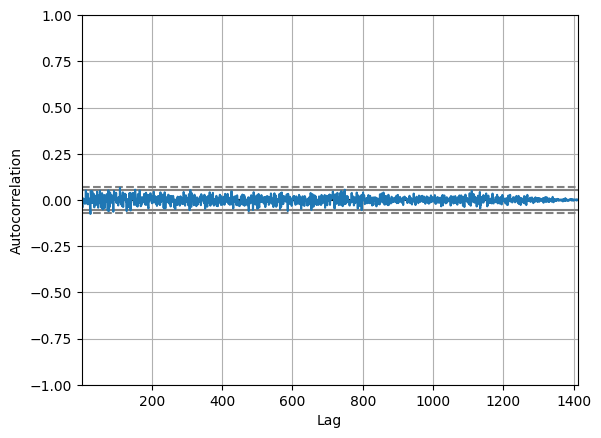

<Figure size 1000x200 with 0 Axes>

In [192]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_df['Close First Difference'].dropna())
plt.figure(figsize=(10,2))
plt.show()

In [193]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

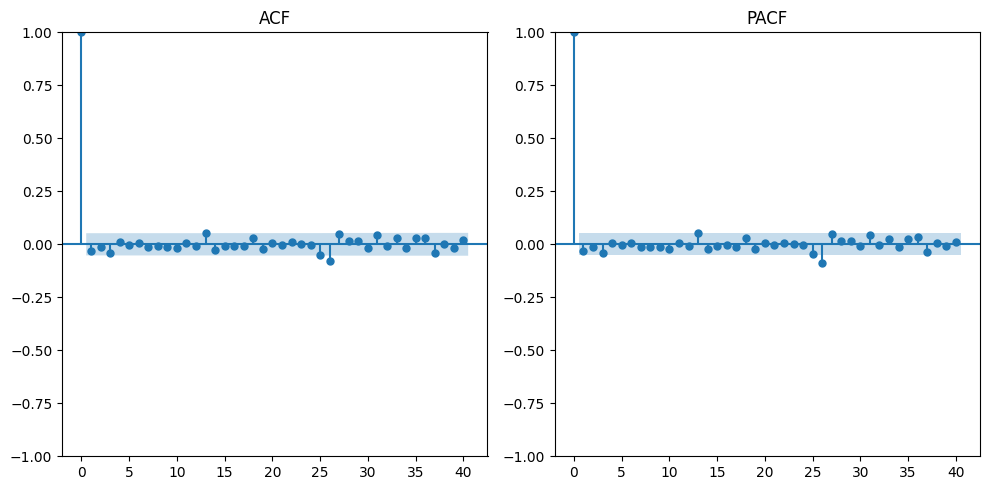

In [194]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# ACF
plot_acf(data_df['Close First Difference'].iloc[13:], lags=40, ax=ax1)
ax1.set_title("ACF")

# PACF
plot_pacf(data_df['Close First Difference'].iloc[13:], lags=40, ax=ax2)
ax2.set_title("PACF")

plt.tight_layout()
plt.show()

In [ ]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

p = range(0, 4)   # valeurs possibles de p
d = range(0, 2)   # valeurs possibles de d
q = range(0, 4)   # valeurs possibles de q

best_aic = float("inf")
best_order = None

for params in itertools.product(p, d, q):
    try:
        model = ARIMA(data_df['Close First Difference'], order=params)
        result = model.fit()
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = params
    except:
        continue

print("Meilleur modèle ARIMA:", best_order)
print("AIC:", best_aic)

Meilleur modèle ARIMA: (0, 0, 0)
AIC: 7433.859850562328


In [200]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data_df['Close First Difference'], order=best_order)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Close First Difference   No. Observations:                 1411
Model:                              ARIMA   Log Likelihood               -3714.930
Date:                    Mon, 27 Oct 2025   AIC                           7433.860
Time:                            15:07:30   BIC                           7444.364
Sample:                                 0   HQIC                          7437.785
                                   - 1411                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0934      0.090      1.040      0.298      -0.083       0.270
sigma2        11.3339      0.233     48.737      0.000      10.878      11.790
===================================================================================
Ljung-Box (L1) (Q):                   1.59   Jarque-Bera (JB):              1342.27
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

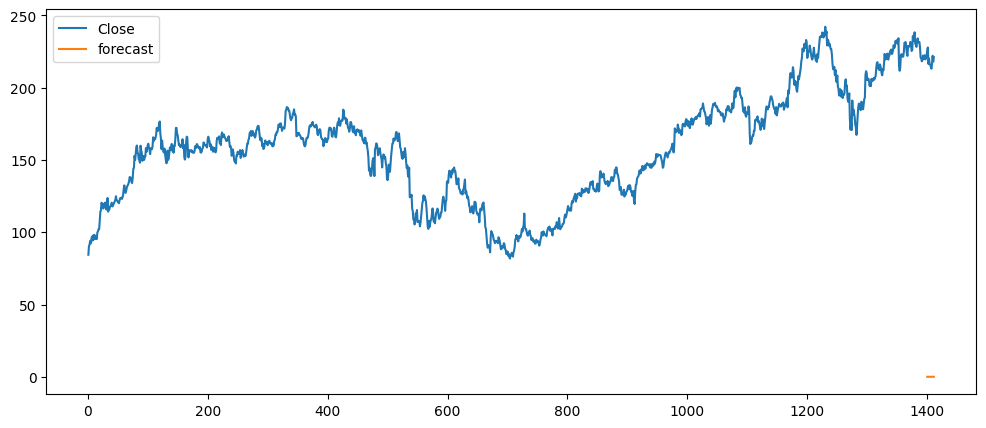

In [203]:
data_df['forecast']=result.predict(start=1400,end=1600,dynamic=True)
data_df[['Close','forecast']].plot(figsize=(12,5))

In [210]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data_df['Close First Difference'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<Axes: >

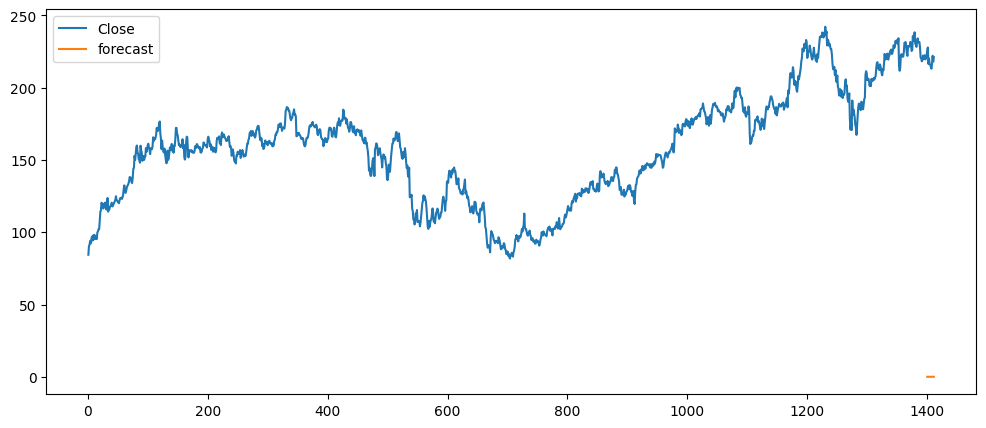

In [212]:
data_df['forecast'] = result.predict(start=1400,end=1800,dynamic=True)
data_df[['Close','forecast']].plot(figsize=(12,5))